In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Use seaborn style defaults and set the default figure size and dpi
sns.set(rc={'figure.figsize':(10, 5), 'figure.dpi':300})
sns.set_style("whitegrid")

## Kerr Case

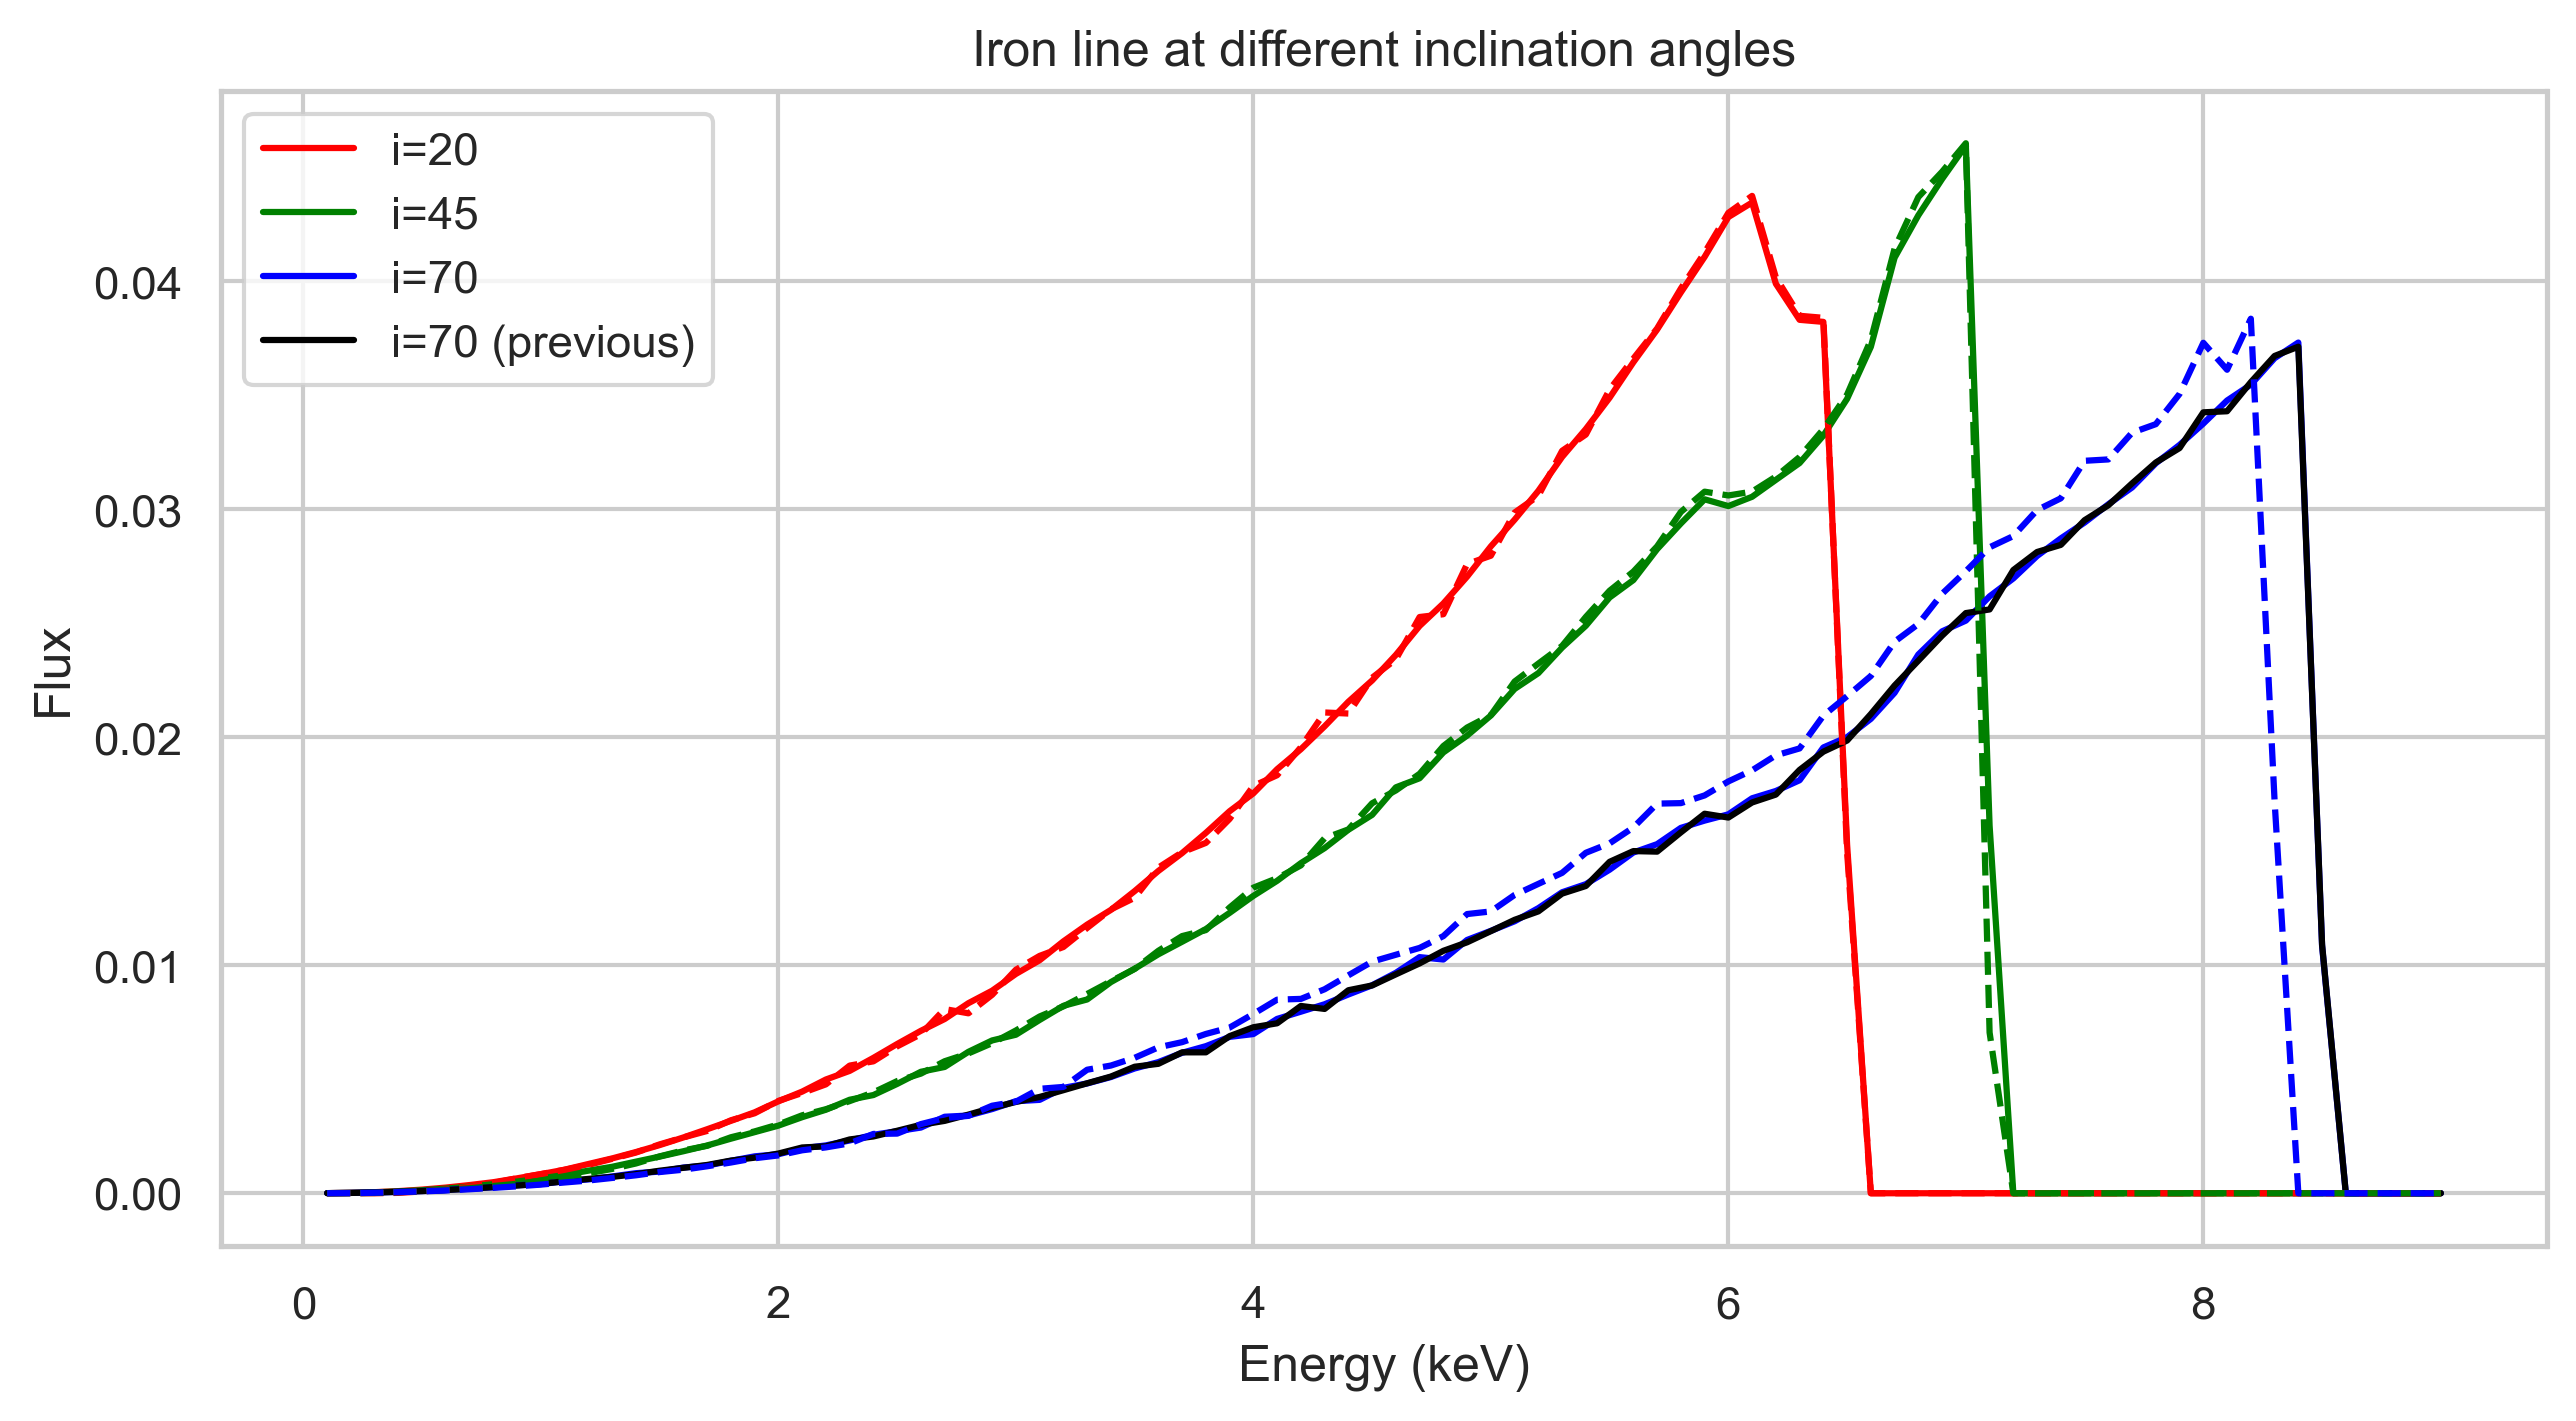

In [17]:
filename_format = r"C:\Users\WalkerXin\Documents\Scripts\raytransfer\ironline\\"+ "iron_a{:.3f}.def{:.2f}.i{:.2f}.dat"
data_20 = pd.read_csv(filename_format.format(0.998, 0.0, 20), header=None, sep=" ")
data_45 = pd.read_csv(filename_format.format(0.998, 0.0, 45), header=None, sep=" ")
data_70 = pd.read_csv(filename_format.format(0.998, 0.0, 70), header=None, sep=" ")
data_70_previous = pd.read_csv(r"C:\Users\WalkerXin\Documents\Scripts\raytransfer\ironline\iron_a0.998.def0.00.i70.00_prev.dat", header=None, sep=" ")

data_20_compare = pd.read_csv(r"C:\Users\WalkerXin\Documents\Scripts\raytransfer\ironline\data\rk45\iron_a0.998.def0.00.i20.00.dat", header=None, sep=" ")
data_45_compare = pd.read_csv(r"C:\Users\WalkerXin\Documents\Scripts\raytransfer\ironline\data\rk45\iron_a0.998.def0.00.i45.00.dat", header=None, sep=" ")
data_70_compare = pd.read_csv(r"C:\Users\WalkerXin\Documents\Scripts\raytransfer\ironline\data\rk45\iron_a0.998.def0.00.i70.00.dat", header=None, sep=" ")

# Plot data
plt.plot(data_20[0], data_20[1], label="i=20", color="red")
plt.plot(data_45[0], data_45[1], label="i=45", color="green")
plt.plot(data_70[0], data_70[1], label="i=70", color="blue")
plt.plot(data_70_previous[0], data_70_previous[1], label="i=70 (previous)", color="black")

# Plot comparison data, with dashed line
plt.plot(data_20_compare[0], data_20_compare[1], color="red", linestyle="--")
plt.plot(data_45_compare[0], data_45_compare[1], color="green", linestyle="--")
plt.plot(data_70_compare[0], data_70_compare[1], color="blue", linestyle="--")

# Add labels and legend
plt.xlabel("Energy (keV)")
plt.ylabel("Flux")
plt.legend()
plt.title("Iron line at different inclination angles")

plt.show()

## Comparative Plots

In [3]:
def subplots(file_dir: str, spin_list: list, defpar_list:list, inc_list: list, component: str=None):
    if component:
        filename_format = file_dir + "\iron_a{:.3f}.def{:.2f}.i{:.2f}_" + f"{component}" + ".dat"
    else:
        filename_format = file_dir + "\iron_a{:.3f}.def{:.2f}.i{:.2f}.dat"
    output_name = "ironline_" + f"{component}" + ".png"
    counter = 0

    plt.figure(figsize=(20, 20), dpi=300)

    spin_len = len(spin_list)
    defpar_len = len(defpar_list)
    inc_len = len(inc_list)

    plt.subplots(spin_len, inc_len, sharex=True, sharey=True)

    for i in range(3):
        for j in range(3):
            for k in range(3):
                try:
                    filename = filename_format.format(spin_list[i], defpar_list[k], inc_list[j])
                    data = pd.read_csv(filename, sep=' ', header=None)
                    plt.plot(data[0], data[1], label='def={:.2f}'.format(defpar_list[k]))
                    counter += 1
                except:
                    continue
            
            # Show legend (deformation) for the first subplot only
            if i == 0 and j == 0:
                plt.legend()

            # Show title (inclination) for first row only
            if i == 0:
                plt.title('i = {:.0f} degrees'.format(inc_list[j]))

            # Show y label (spin) for last column only, put to the right of the subplot
            if j == 2:
                plt.text(1.05, 0.5, 'a = {:.3f}'.format(spin_list[i]), ha='center', va='center', rotation='vertical', transform=plt.gca().transAxes)

            # Adjust the x and y scale
            plt.xlim(0, 10)
            plt.ylim(0, 0.1)

    fig = plt.gcf()
    fig.tight_layout()

    # Define the common x and y labels
    fig.text(0.5, -0.01, 'Energy (keV)', ha='center', va='center')
    fig.text(-0.01, 0.5, 'Fraction of photons', ha='center', va='center', rotation='vertical')
    
    # Add overall title
    fig.text(0.5, 1.01, 'Iron lines with deformed {} component'.format(component), ha='center', va='center', fontsize=20)
    fig.savefig(output_name, bbox_inches='tight', dpi=300)

    print('Total number of plots: {}'.format(counter))
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Total number of plots: 2


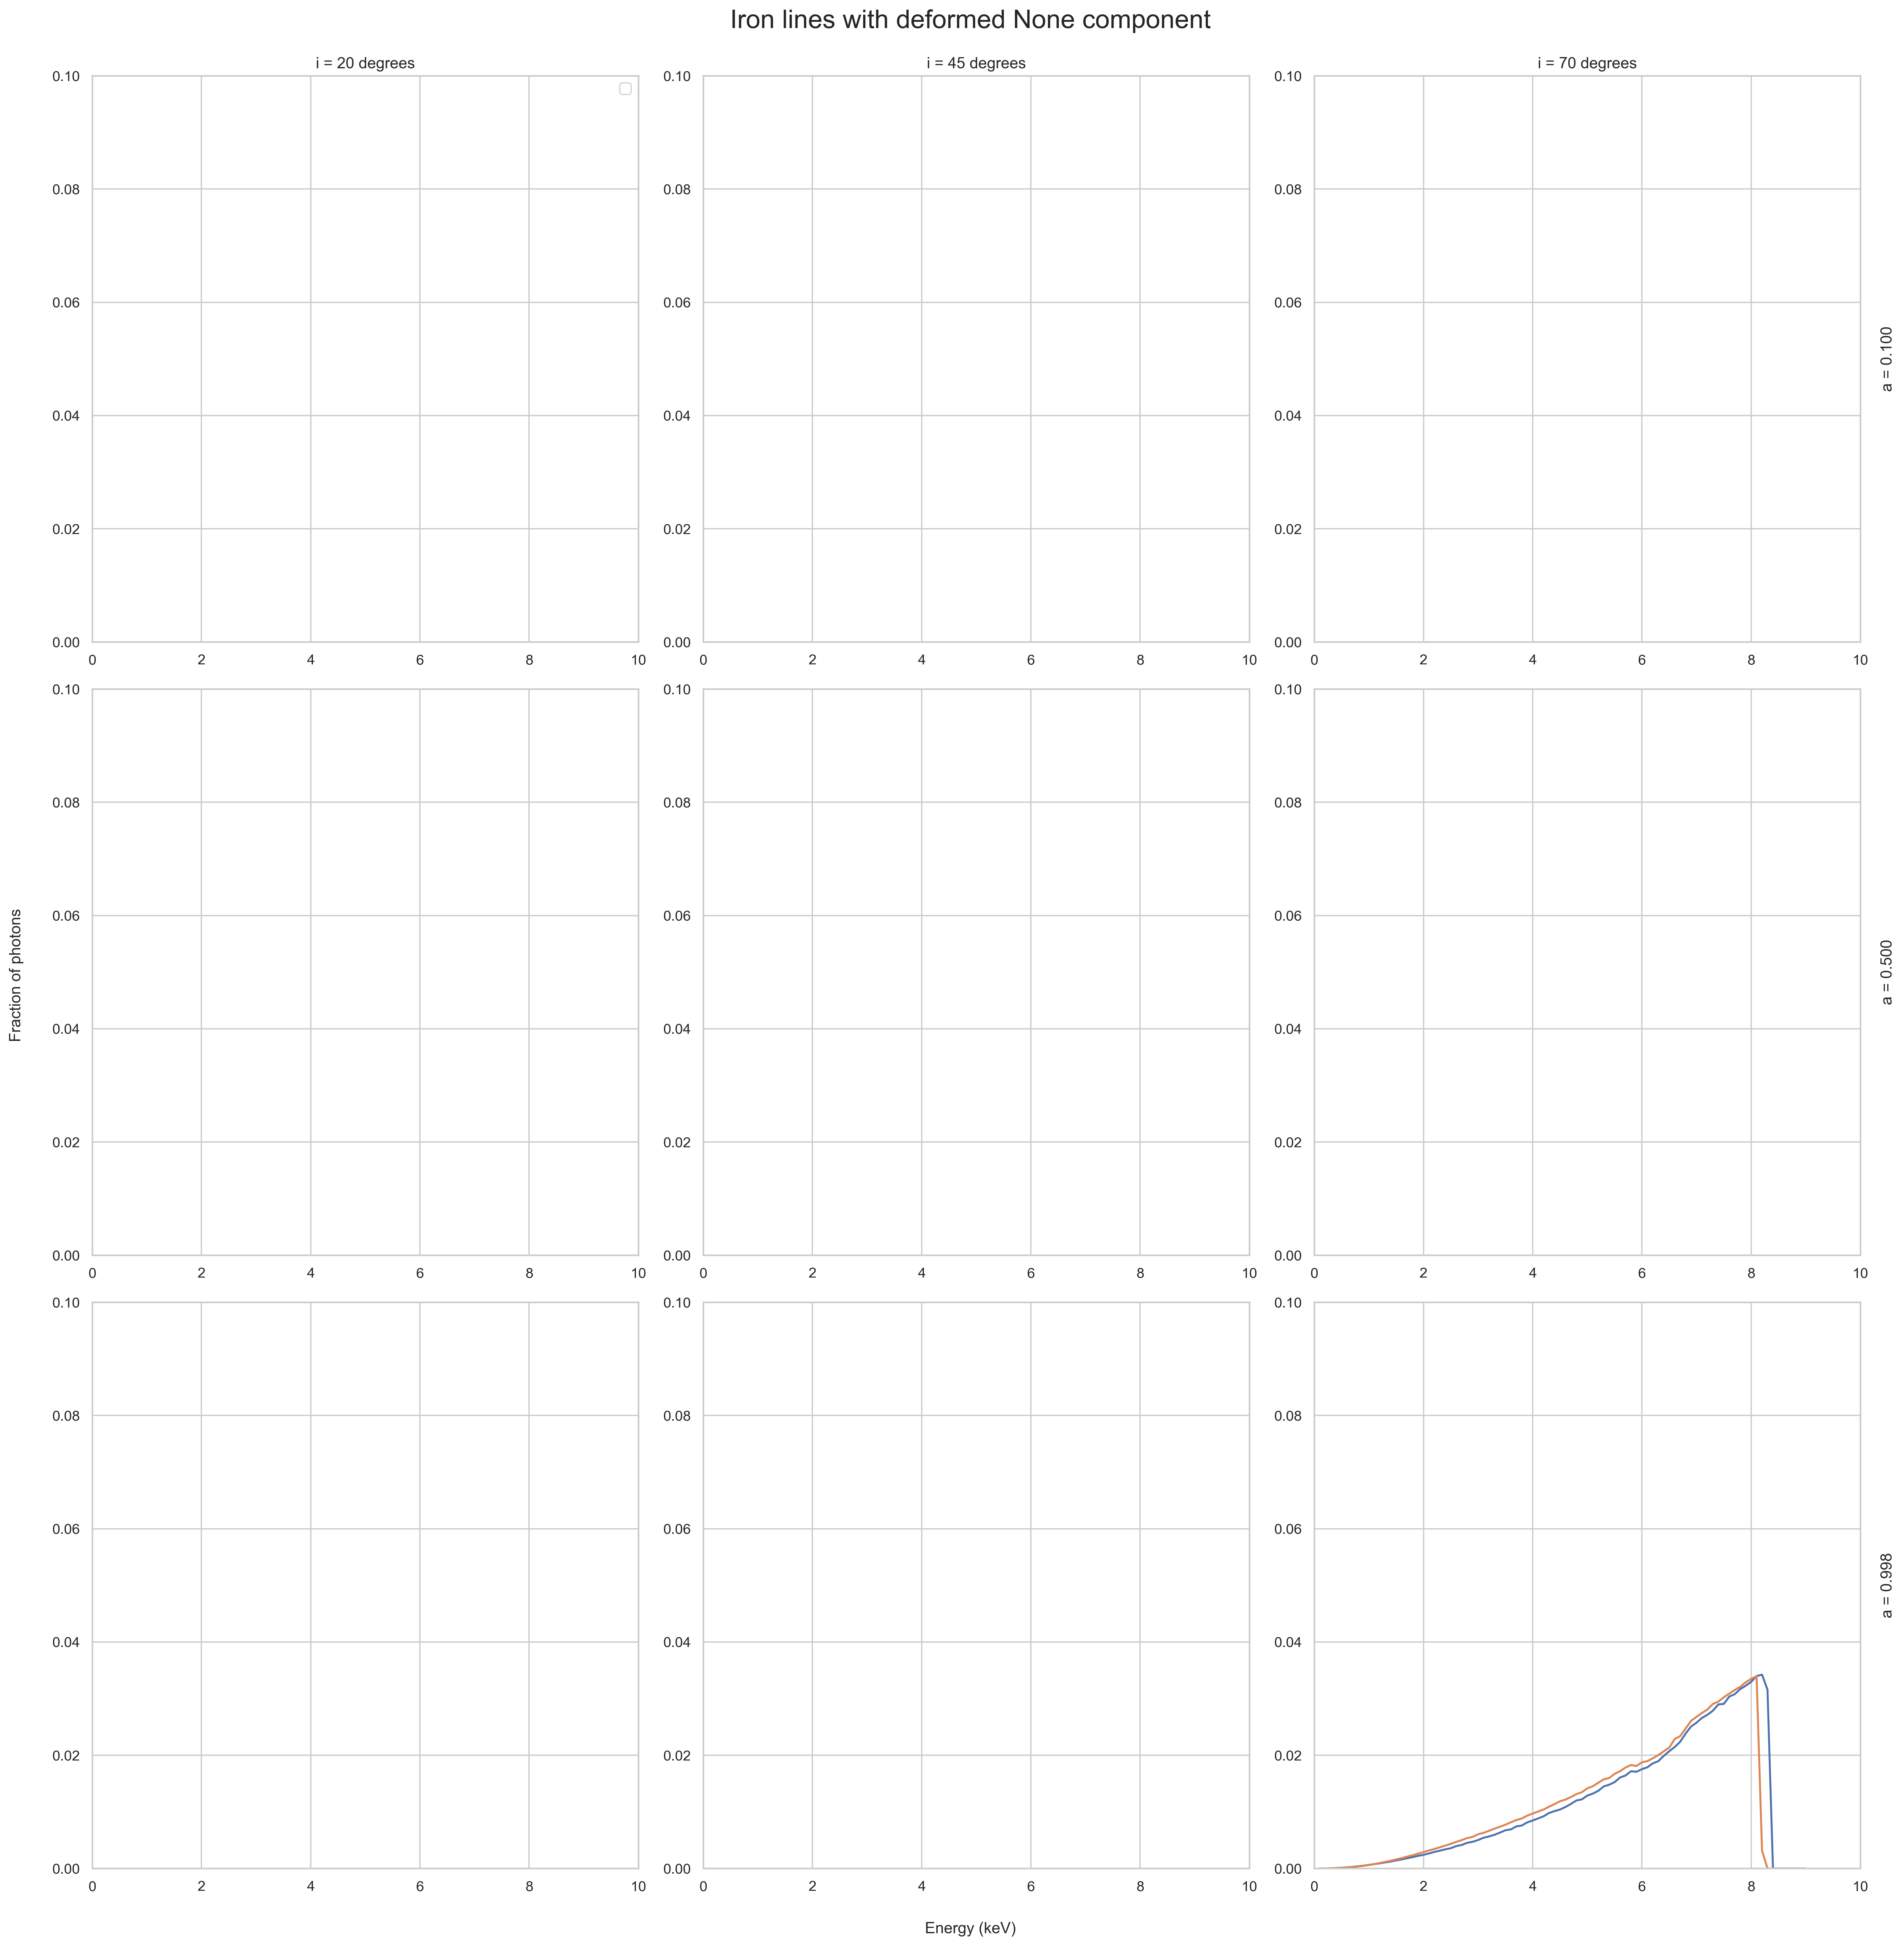

In [7]:
spin_list = [0.10, 0.50, 0.998]
defpar_list = [0.00, 5.00, 10.00]
inc_list = [20.0, 45.0, 70.0]

subplots(r'C:\Users\WalkerXin\Documents\Scripts\raytransfer\ironline', spin_list, defpar_list, inc_list)